In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy
#!pip install sodapy
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("finances.worldbank.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(finances.worldbank.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("3fps-tcuv", limit=100000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
df

,institution,type,maturity,currency,volume,coupon,settlement_date,maturity_date,usd_equivalent,isin,final_terms
0,IBRD,Callable MTN Core,15,USD,15000000.00,4.74500,2022-10-27T00:00:00.000,2037-10-27T00:00:00.000,15000000,XS2547973755,NaN
1,IBRD,Callable MTN Core,2,USD,15000000.00,4.76000,2022-10-26T00:00:00.000,2037-10-26T00:00:00.000,15000000,XS2547716949,NaN
2,IBRD,Callable MTN Core,5,EUR,35000000.00,3.47000,2022-10-18T00:00:00.000,2027-10-18T00:00:00.000,34009500,XS2547292057,{'url': 'https://thedocs.worldbank.org/en/doc/...
3,IBRD,Callable MTN Core,5,EUR,40000000.00,3.31000,2022-10-13T00:00:00.000,2027-10-13T00:00:00.000,38564000,XS2541852211,{'url': 'https://thedocs.worldbank.org/en/doc/...
4,IBRD,Callable MTN Core,5,EUR,50000000.00,3.34000,2022-10-13T00:00:00.000,2027-10-13T00:00:00.000,48572500,XS2543145366,{'url': 'https://thedocs.worldbank.org/en/doc/...
...,...,...,...,...,...,...,...,...,...,...,...
12331,IBRD,NaN,6,CHF,28500000.00,0.025,1950-03-01T00:00:00.000,1956-03-01T00:00:00.000,631763.00,NaN,NaN
12332,IBRD,NaN,12,USD,100000000.00,0.02,1950-02-15T00:00:00.000,1962-02-15T00:00:00.000,100000000.00,NaN,NaN
12333,IBRD,NaN,6,CHF,17000000.00,0.025,1948-04-01T00:00:00.000,1954-04-01T00:00:00.000,3955788.00,NaN,NaN
12334,IBRD,NaN,10,USD,100000000.00,0.025,1947-07-15T00:00:00.000,1957-07-15T00:00:00.000,100000000.00,NaN,NaN


In [3]:
#df = pd.read_csv("https://finances.worldbank.org/resource/3fps-tcuv.csv")

#Changing Exponent values to Integers
#df['volume'] = df['volume'].astype('int64')
#df['usd_equivalent'] = df['usd_equivalent'].astype('int64') 

#Changing datetime to date
df['settlement_date'] = pd.to_datetime(df['settlement_date']).dt.date
df['maturity_date'] = pd.to_datetime(df['maturity_date']).dt.date

#df = df.astype({'institution': 'str', 'type': 'str', 'maturity': 'int', 'curreny': 'str', 'volume': 'int64', 'coupon': 'float', 'settlement_date': 'date', 'maturity_date': 'date', 'usd_equivalent': 'int64', 'isin': 'str', 'final_terms': 'str'})

df

,institution,type,maturity,currency,volume,coupon,settlement_date,maturity_date,usd_equivalent,isin,final_terms
0,IBRD,Callable MTN Core,15,USD,15000000.00,4.74500,2022-10-27,2037-10-27,15000000,XS2547973755,NaN
1,IBRD,Callable MTN Core,2,USD,15000000.00,4.76000,2022-10-26,2037-10-26,15000000,XS2547716949,NaN
2,IBRD,Callable MTN Core,5,EUR,35000000.00,3.47000,2022-10-18,2027-10-18,34009500,XS2547292057,{'url': 'https://thedocs.worldbank.org/en/doc/...
3,IBRD,Callable MTN Core,5,EUR,40000000.00,3.31000,2022-10-13,2027-10-13,38564000,XS2541852211,{'url': 'https://thedocs.worldbank.org/en/doc/...
4,IBRD,Callable MTN Core,5,EUR,50000000.00,3.34000,2022-10-13,2027-10-13,48572500,XS2543145366,{'url': 'https://thedocs.worldbank.org/en/doc/...
...,...,...,...,...,...,...,...,...,...,...,...
12331,IBRD,NaN,6,CHF,28500000.00,0.025,1950-03-01,1956-03-01,631763.00,NaN,NaN
12332,IBRD,NaN,12,USD,100000000.00,0.02,1950-02-15,1962-02-15,100000000.00,NaN,NaN
12333,IBRD,NaN,6,CHF,17000000.00,0.025,1948-04-01,1954-04-01,3955788.00,NaN,NaN
12334,IBRD,NaN,10,USD,100000000.00,0.025,1947-07-15,1957-07-15,100000000.00,NaN,NaN


In [4]:
# df['volume'].to_numeric()
# df.dtypes

df['usd_equivalent']=df['usd_equivalent'].astype(float)
df['maturity']=df['maturity'].astype(float)
df['volume']=df['volume'].astype(float)
df['coupon']=df['coupon'].astype(float)

In [5]:
#Reindexing and finding shape of dataframe
df.iloc[:].reindex()
df.shape

(12336, 11)

In [6]:
#Checking datatypes of the dataframe
df.dtypes

institution         object
type                object
maturity           float64
currency            object
volume             float64
coupon             float64
settlement_date     object
maturity_date       object
usd_equivalent     float64
isin                object
final_terms         object
dtype: object

In [7]:
#Checking null values for each column
df.isnull().sum()

institution            0
type                2881
maturity             997
currency               0
volume                 0
coupon                98
settlement_date        0
maturity_date       3122
usd_equivalent       347
isin                3322
final_terms        11318
dtype: int64

In [8]:
#Dropping null values for the numerical data
df.dropna(subset=['coupon'], inplace=True)
df.dropna(subset=['usd_equivalent'], inplace=True)
df.drop('final_terms', axis=1, inplace=True)
df

,institution,type,maturity,currency,volume,coupon,settlement_date,maturity_date,usd_equivalent,isin
0,IBRD,Callable MTN Core,15.0,USD,15000000.0,4.745,2022-10-27,2037-10-27,15000000.0,XS2547973755
1,IBRD,Callable MTN Core,2.0,USD,15000000.0,4.760,2022-10-26,2037-10-26,15000000.0,XS2547716949
2,IBRD,Callable MTN Core,5.0,EUR,35000000.0,3.470,2022-10-18,2027-10-18,34009500.0,XS2547292057
3,IBRD,Callable MTN Core,5.0,EUR,40000000.0,3.310,2022-10-13,2027-10-13,38564000.0,XS2541852211
4,IBRD,Callable MTN Core,5.0,EUR,50000000.0,3.340,2022-10-13,2027-10-13,48572500.0,XS2543145366
...,...,...,...,...,...,...,...,...,...,...
12331,IBRD,NaN,6.0,CHF,28500000.0,0.025,1950-03-01,1956-03-01,631763.0,NaN
12332,IBRD,NaN,12.0,USD,100000000.0,0.020,1950-02-15,1962-02-15,100000000.0,NaN
12333,IBRD,NaN,6.0,CHF,17000000.0,0.025,1948-04-01,1954-04-01,3955788.0,NaN
12334,IBRD,NaN,10.0,USD,100000000.0,0.025,1947-07-15,1957-07-15,100000000.0,NaN


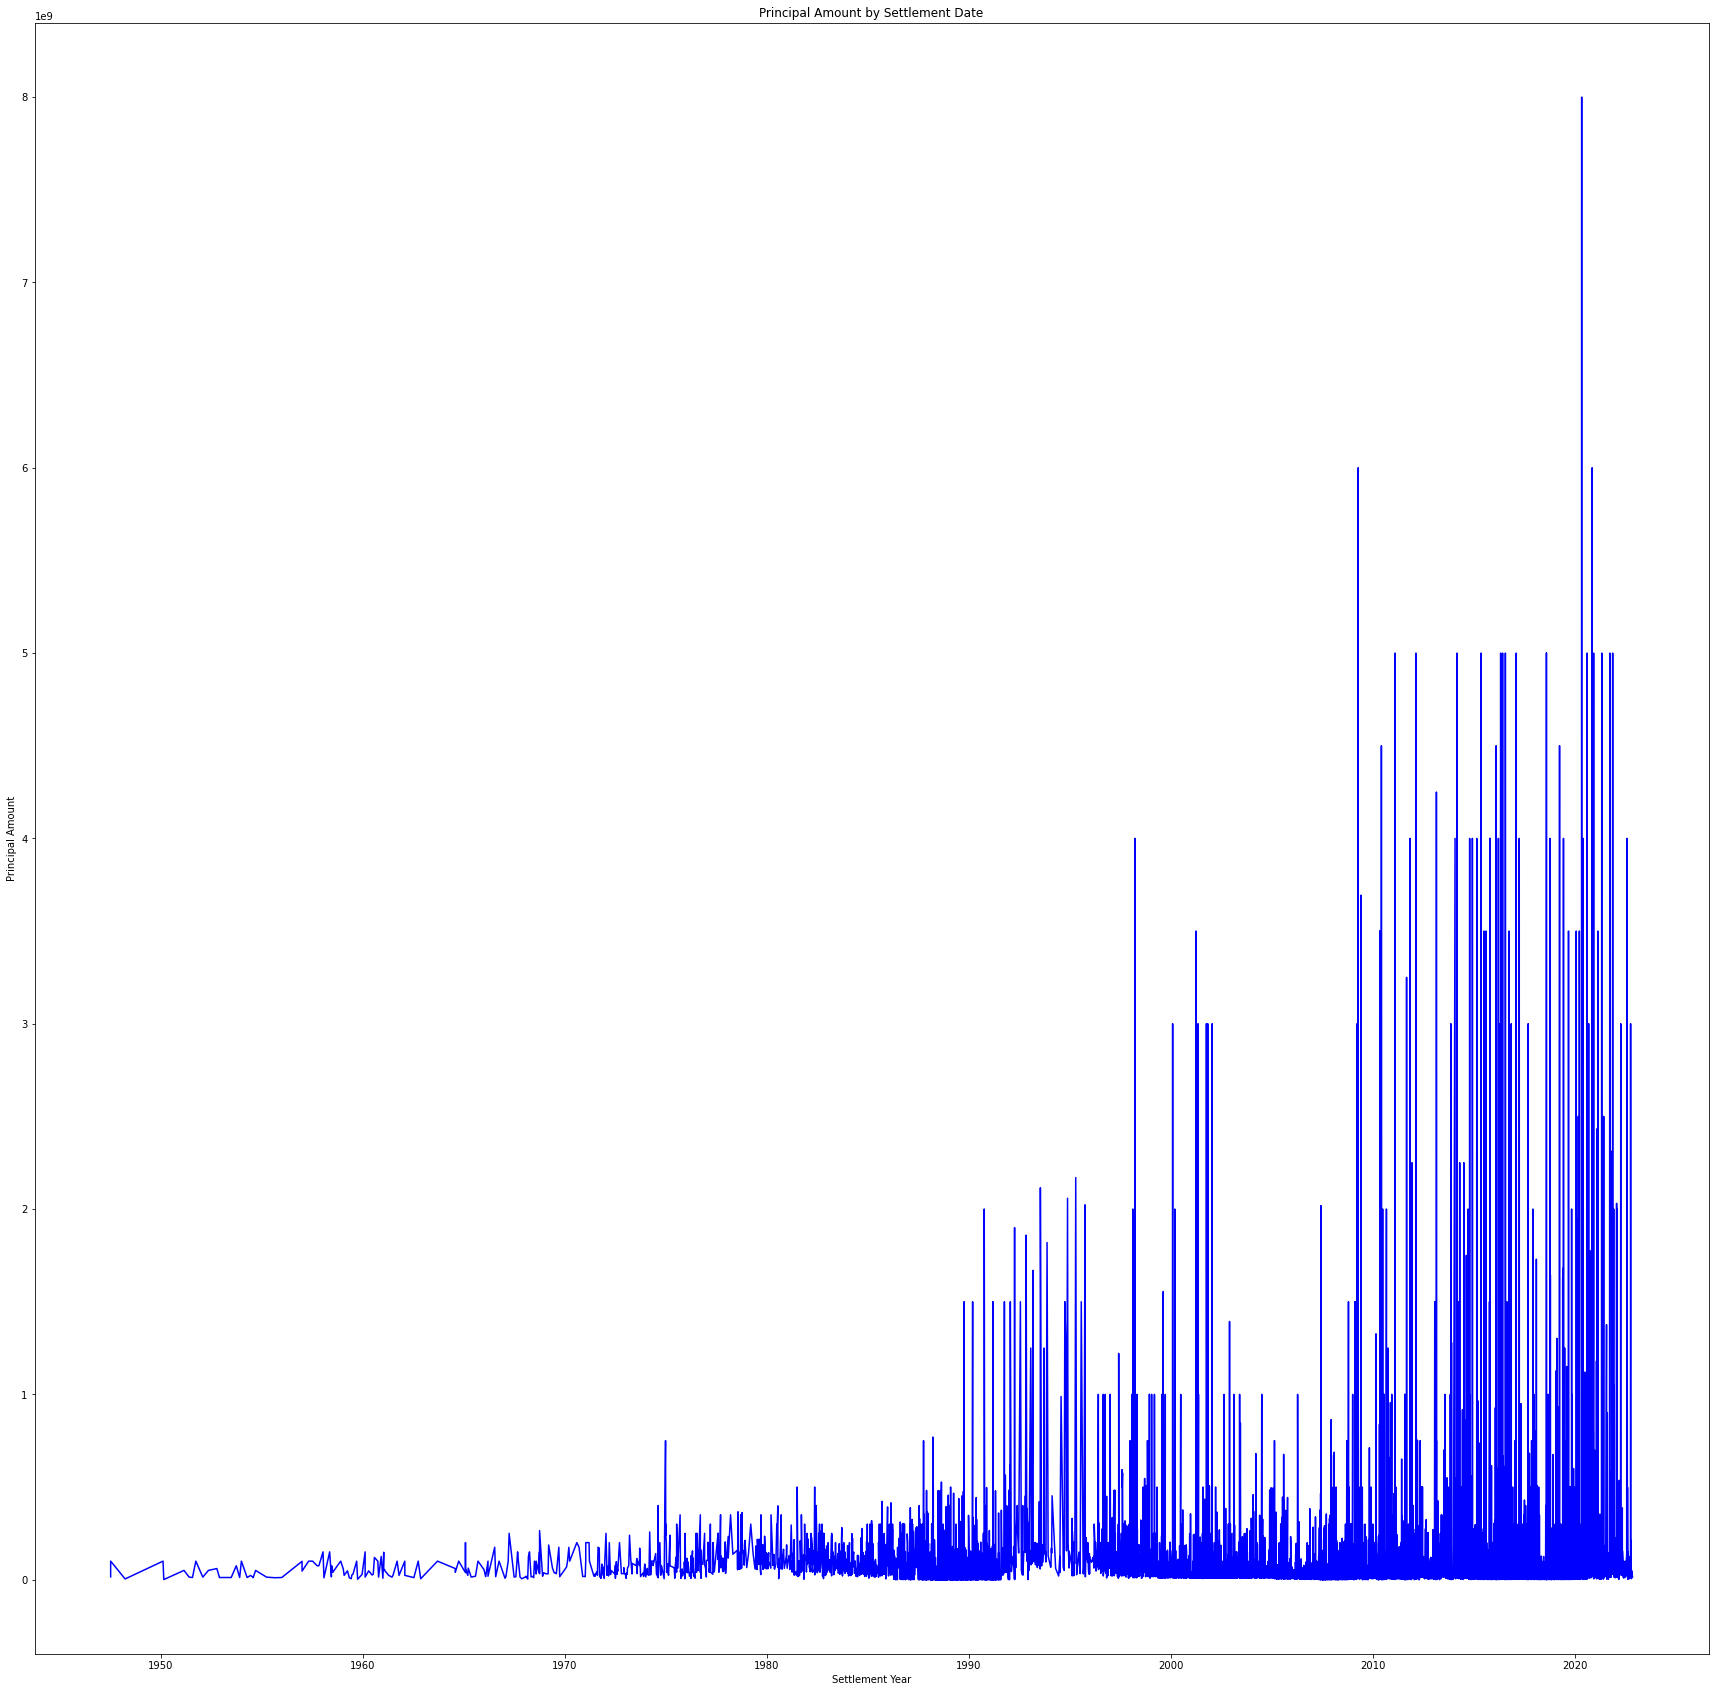

In [9]:
plt.figure(figsize=(30.0,30.0)) 
plt.plot(df['settlement_date'],df['usd_equivalent'], color='b')
plt.title('Principal Amount by Settlement Date')
plt.xlabel('Settlement Year')
plt.ylabel('Principal Amount')
plt.show()

#plt.locator_params(axis='x', nbins = 2)
#plt.xticks(range(2019,2022))
#plt.yaxis.set_major_locator(MaxNLocator(integer=True))
#def locator_params(axis='both', tight=None, set-params()):
    #return gca().locator_params(axis=axis, tight=tight, set_params()


### Extra Method

0        2022-10-27
1        2022-10-26
2        2022-10-18
3        2022-10-13
4        2022-10-13
            ...    
12331    1950-03-01
12332    1950-02-15
12333    1948-04-01
12334    1947-07-15
12335    1947-07-15
Name: settlement_date, Length: 12238, dtype: object


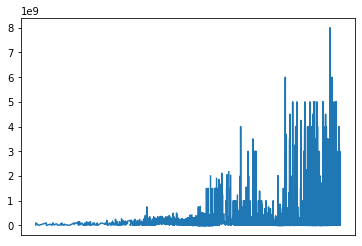

In [24]:
# x_data = pd.date_range('2019-01-01', periods=12, freq='QS') 
x_data = df['settlement_date']
# Check how this dates looks like:
print(x_data)
y_data = df['usd_equivalent']
fig, ax = plt.subplots()

q_ticks = df['settlement_date'].asfreq("QS")
q_ticks
ax.minorticks_off()
ax.set_xticks(q_ticks)
ax.set_xticklabels(q_ticks)
ax.plot(x_data, y_data)
# # Make ticks on occurrences of each month:
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# # Get only the month to show in the x-axis:
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
plt.show()

(array([1.1692e+04, 1.0400e+02, 3.6000e+01, 2.0000e+01, 2.6000e+01,
        4.0000e+00, 1.4000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000000e+03, 8.0000090e+08, 1.6000008e+09, 2.4000007e+09,
        3.2000006e+09, 4.0000005e+09, 4.8000004e+09, 5.6000003e+09,
        6.4000002e+09, 7.2000001e+09, 8.0000000e+09]),
 <BarContainer object of 10 artists>)

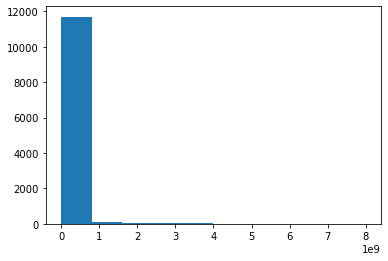

In [20]:
plt.hist(df['usd_equivalent'])

In [11]:
df1 = df[df['usd_equivalent']<=1000000000]
df1.shape

(11753, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x212113a8fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x212113b76d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212113a8c70>],
 'medians': [<matplotlib.lines.Line2D at 0x212113b7d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x212113c5130>],
 'means': []}

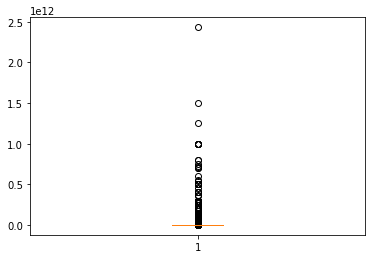

In [14]:
#plt.boxplot(df1['usd_equivalent'])
#plt.boxplot(df1['coupon'])
plt.boxplot(df1['volume'])

## Brainstorm for part 2

In [39]:
import pycountry


In [46]:
# !pip install pycountry
x= pycountry.countries.get(numeric='756')
x.name

In [49]:
x.name

'Switzerland'